# Problema 
## DESAFIO 1

Implementação e simulação computacional de um SAD.
Uma empresa de artigos de couro fabrica dois tipos de produtos: malas e mochilas.

As malas são vendidas com um lucro de R$ 50,00 por unidade e o lucro unitário por mochila é igual a R$ 40,00.
A quantidade de horas necessárias para confeccionar cada produto, assim como o número total de horas disponíveis em cada departamento, são apresentados na tabela.

A modelagem matemática do SAD também está indicada, onde x1= quantidade de malas e x2= quantidade de mochilas.
Sabe-se que, atualmente, a empresa produz diariamente 120 unidades de malas e 30 unidades de mochilas.

### RESPONDA:
 1 - Indique o planejamento ótimo obtido com a utilização do SAD. Utilizar o software LINDO (ou similar) para implementar e executar computacionalmente o modelo de otimização do SAD.
 
 2 – Indique o aumento (percentual) de lucro da empresa caso adote a solução do SAD frente aquela praticada atualmente pela empresa.
 
 3 – Apresente uma proposta de cenário de atuação da empresa com o acréscimo de um novo produto ao mix de produção. Devem ser indicados os dados, a nova modelagem, a nova implementação computacional e a nova solução proposta pelo SAD.

IPython console for SymPy 1.8 (Python 3.8.11-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



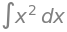

In [37]:
import sympy#para lidar com matematica simbólica. #recomendo o uso da fonte JuliaMono
sympy.init_session()
#teste do pprint
Integral(x**2)

In [48]:
import numpy as np
import scipy as sp
import matplotlib

matplotlib.set_loglevel("error") #Para suprimir os avisos irritantes de deprecation do matplotlib.
import matplotlib.pyplot as plt


import scipy.optimize as opt
import scipy.linalg as linalg

In [130]:
#criando os simbolos e outras variáveis
x1, x2 = symbols("x_1 x_2")

Lucro = np.array([50,40])@(x1, x2)

restricoes = [
    2*x1 + 0*x2 <= 300,
    3*x2 <= 540,
    2*x1 + 2*x2 <= 440,
    1.2*x1 + 1.5*x2 <= 300,
    x1 >= 0,
    x2 >= 0,
]

restricoes

temos o problema devidamente apresentado, bastando apenas resolve-lo
usaremos a função scipy.optimize.linprog()
Infelizmente, Essa função nao recebe parametros da forma que os escrevemos, mas sim como matrizes, como podemos  ver em sua documentação:

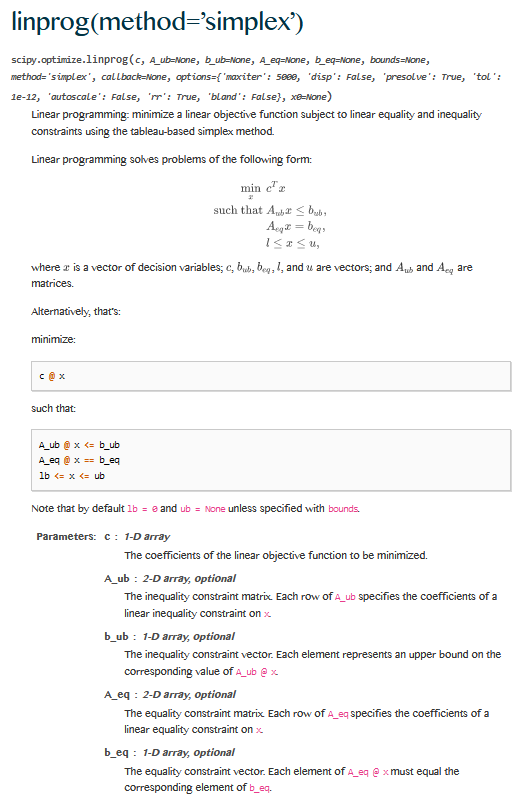


In [116]:
x_vec = Matrix([x1, x2])
#primeiro retiramos os coeficientes do lucro
c = lucro_coeffs = [Lucro.coeff(xi) for xi in x_vec]
c

In [148]:
#repetimos um rocesso semelhante para as restrições
A_ub = [[restricao.lhs.coeff(xi) for xi in [*x_vec]] for restricao in restricoes]
pprint(A_ub)
b_ub = [[restricao.rhs.coeff(xi) for xi in [1]] for restricao in restricoes]
b_ub

[[2, 0], [0, 3], [2, 2], [1.2, 1.5], [1, 0], [0, 1]]


In [135]:
rhs(A_ub[0])



NameError: name 'rhs' is not defined